# DU Data Analytics-Coding Bootcamp 
- hw09_Checklist[]

[] Dependencies

In [514]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import seaborn
from matplotlib import style
style.use('dark_background')
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine,Column,String,Integer,Float, Date, func

 [ ] SQLalchemy to reflect SQLite database

In [515]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
Base = automap_base()
Base.prepare(engine, reflect=True)
Measurement = Base.classes.measurement
Station = Base.classes.station
session = Session(engine)

 [ ] create a python class, related to SQLite database: object oriented approach

In [516]:
class Measurements(Base):
    __tablename__ = 'hawaii_measurements'
    id = Column(Integer, primary_key = True)
    station = Column(String)
    date = Column(String)
    prcp = Column (Float)
    tobs = Column(Integer)
    def __repr__(self):

        return "<Measurements(%r, %r, %r, %r)>" % (self.station, self.date, self.prcp, self.tobs)

[ ] Perform a query to retrieve the data and precipitation scores

In [517]:
query_dp= session.query(Measurement.date,Measurement.prcp).\
order_by(Measurement.date).all()

[ ] Save the query results as a Pandas DataFrame and set the index to the date column

In [518]:
dateprcp_df = pd.DataFrame(query_dp)
# get rid of the NaN in prcp/Precipitation column
dateprcp_df = dateprcp_df.fillna(0)
dateprcp_df = dateprcp_df.set_index('date')

In [519]:
prcp_df = pd.DataFrame(query_dp)
prcp_df = prcp_df.fillna(0)
prcp_df['date_dt'] = pd.to_datetime( prcp_df['date'])
prcp_df = prcp_df.sort_values("date_dt", ascending=False).reset_index()
backupprcp_df = prcp_df.copy

[ ]  Calculate the date 1 year ago from the last data point in the database

In [520]:
# mostrecent_date = prcp_df['date_dt'][0] as defined above
mostrecent_date_dt = pd.Timestamp.date(mostrecent_date)
# ayearago = prcp_df['date_dt'][0] - dt.timedelta(days=365) as defined above
ayearago_dt = pd.Timestamp.date(ayearago)

[ ] Use Pandas Plotting with Matplotlib to plot the data

In [521]:
# five dates as ticks for x_axis: xticks 
loc = np.arange(0,len(prcp_df),len(prcp_df)//4)
labels = []
# run a loop to obtain array of dates for  five equally distanced x_ax-ticks
for locc in loc:
    p_loc = prcp_df['date'][locc]
    labels.append(p_loc)
# arrays for plot obtained now formatting below:

local copy of figure saved as Fig1_HawaiiPrecipitation.PNG


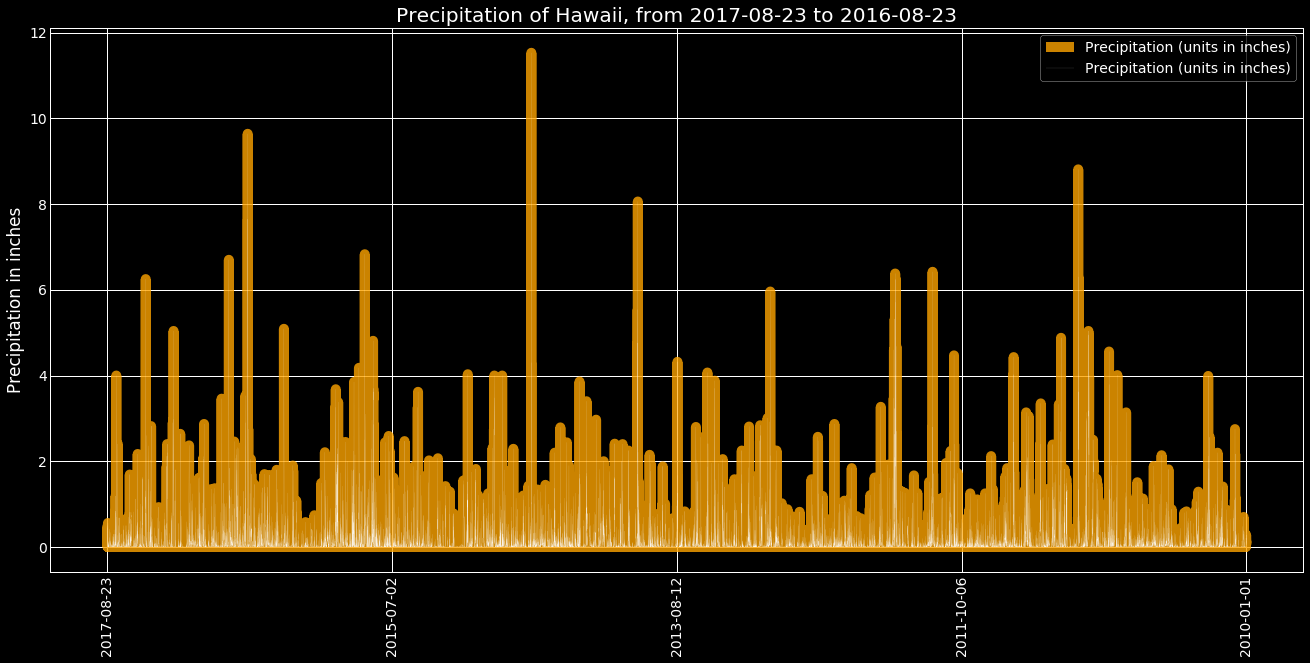

In [529]:
plt.figure(figsize=(20,10))
plt.rcParams["font.size"] = 14
plt.title('Precipitation of Hawaii, from %s to %s' %( mostrecent_date_dt,ayearago_dt))
plt.grid(True)
legend_label = 'Precitation (units in inches)'
plt.plot(prcp_df['prcp'],color='orange', linestyle='-',\
         linewidth = '10',alpha=0.8,\
         label='Precipitation (units in inches)')
# thinner second line inner positioned for ease of read
plt.plot(prcp_df['prcp'],color='w', linestyle='-',\
         linewidth = '0.1',alpha=0.9,\
         label='Precipitation (units in inches)')
plt.xticks(loc,labels,rotation="vertical") 
plt.margins(0.05) 
plt.ylabel('Precipitation in inches')
# plt.xlabel('Observation Date')
plt.legend(loc='upper right')
# plt.tight_layout()
filename1 = 'Fig1_HawaiiPrecipitation'
print('local copy of figure saved as %s.PNG' %(filename1))
plt.savefig(filename1) 
plt.show()

[ ] Use Pandas to calculate the summary statistics for the precipitation data 

In [528]:
# prcp_df.columns ['date', 'prcp']
sumstats_df = pd.DataFrame(prcp_df['prcp'].describe())
sumstats_df  #stores statistical profile of whole table per above columns

,prcp
count,19550.000000
mean,0.148753
std,0.453021
min,0.000000
25%,0.000000
50%,0.010000
75%,0.090000
max,11.530000


[ ] Design a query to show how many stations are available in this dataset?
  

In [31]:
count_stn = session.query(Station.station).count()
print(f'total of %i stations available in this dataset' %count_stn)

total of 9 stations available in this dataset


[ ] What are the most active stations? (i.e. what stations have the most rows)?

In [12]:
# store query results
mostactive_stnQ = session.query(Measurement.station,Measurement.tobs).\
order_by(Measurement.date).all()    

In [13]:
# convert to dataframe _df
stntobs_df = pd.DataFrame(mostactive_stnQ)
stntobs_df.head()

,station,tobs
0,USC00519397,65.0
1,USC00513117,67.0
2,USC00518838,72.0
3,USC00519523,75.0
4,USC00519281,70.0


In [14]:
# group by station per row count then sort by number of tobs then reset index so station on df as values
mostactive_df = stntobs_df.groupby('station').count().sort_values('tobs',ascending=False).reset_index()
mostactive_df.head(1)

,station,tobs
0,USC00519281,2772


In [15]:
mostactive_stn = mostactive_df['station'][0]
mostactive_tobscount = mostactive_df['tobs'].max(0)
print('most active station in the dataset is %s with %s observations' %(mostactive_stn,mostactive_tobscount))


most active station in the dataset is USC00519281 with 2772 observations


[ ]List the stations and the counts in descending order.

In [16]:
# please refer to next above cell where _df created
mostactive_df

,station,tobs
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


* Using the station id from the previous query:

In [17]:
mostactive_dfc= stntobs_df.copy() # copy from master dataset then locate rows of most active stn
mostactivetobs_df= mostactive_dfc.loc[mostactive_dfc['station']== mostactive_stn].set_index('station')
mostactivetobs_df.describe()

,tobs
count,2772.000000
mean,71.663781
std,4.357642
min,54.000000
25%,69.000000
50%,72.000000
75%,74.000000
max,85.000000


[ ] Calculate the lowest temperature recorded observed from most active station?

In [464]:
print('lowest temp observed by most active stn is %s'
      %mostactivetobs_df['tobs'].min()
       )

lowest temp observed by most active stn is 54.0


[ ]  highest temperature recorded observed from most active station? 

In [463]:
print('highest temp observed by most active stn is %s'
      %mostactivetobs_df['tobs'].max()
       )

highest temp observed by most active stn is 85.0


[ ]  average temperature observed from most active station?

In [462]:
print('average temp observed by most active stn is %s'
      %round(mostactivetobs_df['tobs'].mean(),2)
       )

average temp observed by most active stn is 71.66


[ ] Choose the station with the highest number of temperature observations.`

In [39]:
mostactivestation_query = session.query(Station.station,func.count(Measurement.tobs)).\
              filter(Station.station==Measurement.station).\
               group_by(Station.station).\
              order_by(func.count(Measurement.tobs).desc()).all()

In [45]:
chosen_one = mostactivestation_query[0][0] #   'USC00519281' type: string

[ ] Query the last 12 months of temperature observation data for this station  and plot the results as a histogram

In [177]:
# mostrecent_date_dt 
# ayearago_dt 

In [131]:
mostactive12mo_tobs=session.query(Measurement.tobs).\
                    filter(Measurement.station==chosen_one).\
                    filter(Measurement.date>=ayearago_dt).\
                    order_by(Measurement.tobs.desc()).all()

In [156]:
type(mostactive12mo_tobs[0]) 
# returns sqlalchemy.util._collections.result-- thus object could be parsed further to reach values

sqlalchemy.util._collections.result

In [157]:
type(mostactive12mo_tobs[0][0]) 
# returns float --thus those values should be stored in a list to obtain an array for hist

float

In [538]:
# as per the above, need to iterate through each row to collect column_name[0][0]
x_hist = [] # firstly define a list to store above mentioned floats/temp obs. values
# iter:
for i in range (0,len(mostactive12mo_tobs)):
    x_hist.append(mostactive12mo_tobs[i][0])
    #
len(x_hist) # returns 2,772 confirmed as total obs count of most active station

2772

a local copy of figure file saved as Fig2_HawaiiTempByMostActiveStation.PNG


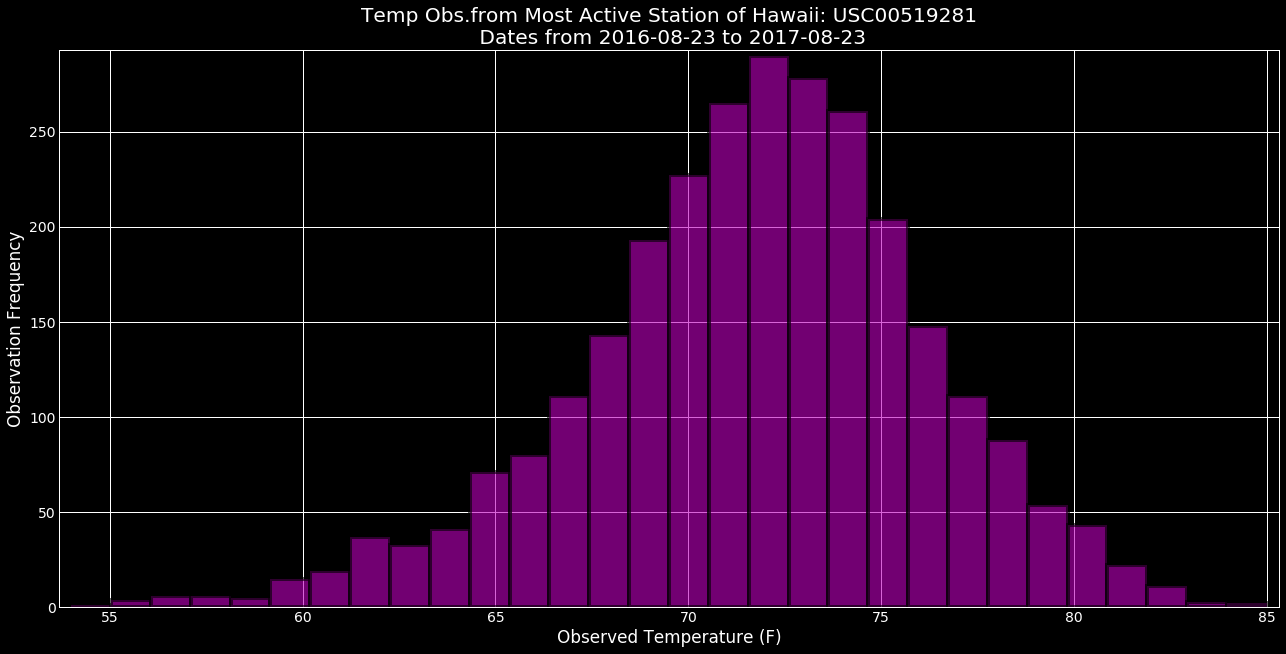

In [542]:
plt.figure(figsize=(18,9))
plt.rcParams["font.size"] = 14
plt.title('Temp Obs.from Most Active Station of Hawaii: %s\n Dates from %s to %s' %(chosen_one,ayearago_dt,mostrecent_date_dt))
plt.grid(True)
legend_label = 'Temp (units in F)'

plt.margins(0.01) 
plt.tight_layout()
plt.box(True)
plt.hist(x_hist,  bins=30,color='m', edgecolor='black',\
         linewidth=4, linestyle='-', alpha=0.600)
plt.ylabel('Observation Frequency')
plt.xlabel('Observed Temperature (F)')
filename2 = 'Fig2_HawaiiTempByMostActiveStation'
print('a local copy of figure file saved as %s.PNG' %(filename2))
plt.savefig(filename2) 
plt.show()

In [447]:
 # This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """this function will return 
    TMIN, lowest temperature observation
    TAVG, average/mean of series of observations entered
    TMAX, highest temperature observation
    for a list of dates between two input dates
    ----Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs),\
                         func.avg(Measurement.tobs),\
                         func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2010-01-01', '2017-08-23'))
#  select min(tobs ), max(tobs), avg(tobs) from measurement; query confirmed below output

[(53.0, 73.09795396419437, 87.0)]


* trip dates: 2017-07-08 to 2017-07-18

In [460]:
# Usecalc_temps` to calculate the tmin, tavg, and tmax for your trip using the previous year's data for those same dates.




In [461]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

In [ ]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation


In [ ]:
# Optional Challenge Assignment
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

In [ ]:
def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
 # calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date

In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
 

In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
 